## 例題3.2

例題3.1の処理をPythonでコーディングせよ．

[numpy.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)

[numpy.std](https://numpy.org/doc/stable/reference/generated/numpy.std.html)

データの準備と表示

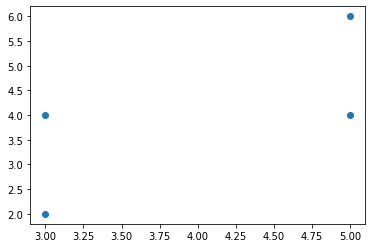

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[3,2],[3,4],[5,4],[5,6]])
plt.scatter(X[:,0], X[:,1])

標準化

In [2]:
X_normalized = (X - np.mean(X, axis=0))/np.std(X, axis=0)
X_normalized

array([[-1.        , -1.41421356],
       [-1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  1.41421356]])

標準化後のデータの表示

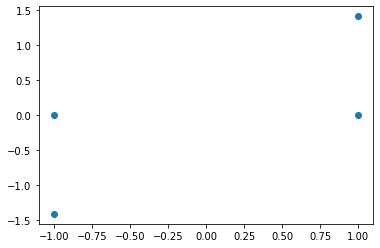

In [3]:
plt.scatter(X_normalized[:,0], X_normalized[:,1])

機械学習ライブラリ scikit-learn を利用したコード

[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [4]:
from sklearn.preprocessing import StandardScaler

X = np.array([[3,2],[3,4],[5,4],[5,6]])

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized

array([[-1.        , -1.41421356],
       [-1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  1.41421356]])

## 例題3.5

例題3.4の処理を Python でコーディングせよ．

[numpy.cov](https://numpy.org/doc/stable/reference/generated/numpy.cov.html)

[numpy.linalg.eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)

標準化後のデータから共分散行列を計算し、その共分散行列の第1固有ベクトルを計算

In [5]:
S = np.cov(X_normalized, rowvar=0, bias=1) # 共分散行列
eig_val, eig_vec = np.linalg.eig(S)
eig_vec[:,0]  # 第1固有ベクトル

array([0.70710678, 0.70710678])

第1固有ベクトルを用いた1次元データへの変換

In [6]:
X1 = np.dot(X_normalized, eig_vec[:,0])
X2 = X1 / np.std(X1)
X2

array([-1.30656296, -0.5411961 ,  0.5411961 ,  1.30656296])

機械学習ライブラリ scikit-learn を利用したコード

[PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X1 = pca.fit_transform(X_normalized)
X2 = X1[:,0] / np.std(X1)
X2

array([-1.30656296, -0.5411961 ,  0.5411961 ,  1.30656296])